# ✅ Part 1: Fetch 1-year stock data using yfinance

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [2]:
ticker = "AAPL"  
data = yf.download(ticker, period="1y")
data.head()


YF.download() has changed argument auto_adjust default to True



*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-06-26,212.257339,213.859846,209.659488,210.515486,66213200
2024-06-27,213.103394,214.735759,211.361540,213.690644,49772700
2024-06-28,209.639557,215.064199,209.321054,214.765593,82542700
2024-07-01,215.741043,216.497500,210.933525,211.102731,60402900
2024-07-02,219.244675,219.354163,214.098742,215.143842,58046200


# 📉 Part 2: Linear Regression – Predict next day close price with MSE + plot

In [3]:
data["Next_Close"] = data["Close"].shift(-1)
data.dropna(inplace=True)


In [4]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = data[features]
y = data["Next_Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 14.716950149169952


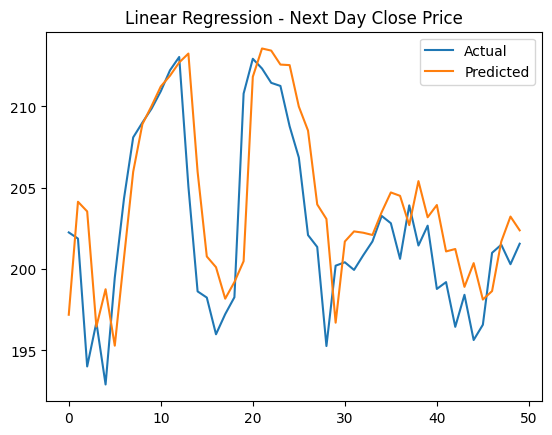

In [5]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Linear Regression - Next Day Close Price')
plt.show()


# 📊 Part 3: Logistic Regression – Predict movement (up/down) + Confusion Matrix

In [17]:
import yfinance as yf
import pandas as pd

# Step 1: Download data
data = yf.download("AAPL", period="1y")

# Step 2: Fix 'Close' column by flattening it
close_series = pd.Series(data["Close"].values.squeeze(), index=data.index)

# Step 3: Shift to get Next_Close
next_close = close_series.shift(-1)

# Step 4: Drop last row to align
close_series = close_series.iloc[:-1]
next_close = next_close.iloc[:-1]

# Step 5: Binary target: 1 if next_close > close
target = (next_close > close_series).astype(int)

# Step 6: Final DataFrame
final_df = pd.DataFrame({
    "Close": close_series,
    "Next_Close": next_close,
    "Target": target
})

# Step 7: View result
print(final_df.tail())


[*********************100%***********************]  1 of 1 completed

                 Close  Next_Close  Target
Date                                      
2025-06-17  195.639999  196.580002       1
2025-06-18  196.580002  201.000000       1
2025-06-20  201.000000  201.500000       1
2025-06-23  201.500000  200.300003       0
2025-06-24  200.300003  201.559998       1


[*********************100%***********************]  1 of 1 completed

✅ Accuracy: 0.54
Confusion Matrix:
 [[ 2 21]
 [ 2 25]]


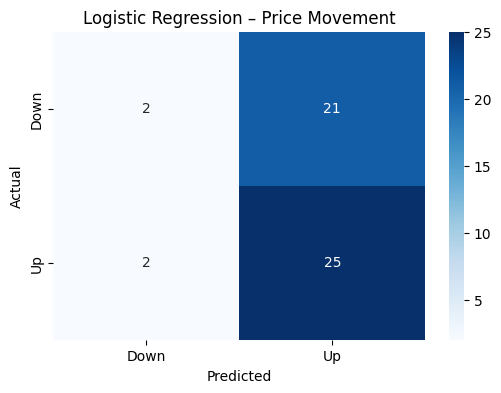

In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Fetch data
raw_data = yf.download("AAPL", period="1y")

# Step 2: Convert 'Close' column to 1D Series
close_series = raw_data["Close"].squeeze()

# Step 3: Shift Close to create Next_Close
next_close = close_series.shift(-1)

# Step 4: Drop last row to align
close_series = close_series.iloc[:-1]
next_close = next_close.iloc[:-1]

# Step 5: Target = 1 if price goes up, else 0
target = (next_close > close_series).astype(int)

# Step 6: Rebuild the DataFrame with all proper columns
data = raw_data.iloc[:-1].copy()  # match the aligned close/next_close/target
data["Close"] = close_series      # flatten Close
data["Next_Close"] = next_close
data["Target"] = target

# Step 7: Logistic Regression
features = ["Open", "High", "Low", "Close", "Volume"]
X = data[features]
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 8: Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("✅ Accuracy:", acc)
print("Confusion Matrix:\n", cm)

# Step 9: Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression – Price Movement")
plt.show()


#  Part 4:	KNN Classifier with k = 3, 5, 7 + Best model heatmap


🔍 KNN Accuracy for Different K Values:
K = 3, Accuracy = 0.5800
K = 5, Accuracy = 0.5600
K = 7, Accuracy = 0.5600
K = 9, Accuracy = 0.5200

✅ Best K = 3 with Accuracy = 0.5800
Confusion Matrix:
 [[12 11]
 [10 17]]


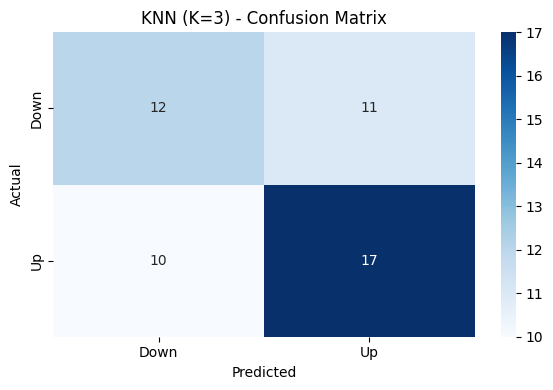

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate different K values and track best
best_k = None
best_acc = 0
best_pred = None

print("\n🔍 KNN Accuracy for Different K Values:")
for k in [3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_knn)
    print(f"K = {k}, Accuracy = {acc:.4f}")

    if acc > best_acc:
        best_k = k
        best_acc = acc
        best_pred = y_pred_knn

# Show best K results
print(f"\n✅ Best K = {best_k} with Accuracy = {best_acc:.4f}")
cm = confusion_matrix(y_test, best_pred)
print("Confusion Matrix:\n", cm)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"KNN (K={best_k}) - Confusion Matrix")
plt.tight_layout()
plt.show()
